In [1]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.cluster import KMeans

from sklearn.model_selection import KFold
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

plt.rcParams['figure.figsize'] = [16, 10]

In [2]:
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')


In [3]:
X = df[['lln_00', 'lan_06', 'psa_04', 'lat', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11', 'lon',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00']]

y= df["target"]

Xtest= df_test[['lln_00', 'lan_06', 'psa_04', 'lat', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11', 'lon',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

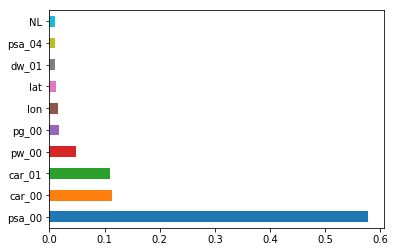

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
#%matplotlib inline            # don't forget this if you're using jupyter!



model = RandomForestRegressor()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))  

# RANDOM FOREST REGRESSOR

In [5]:
rf = RandomForestRegressor(n_estimators=466, min_samples_split=5, max_features= 'sqrt',
                           min_samples_leaf=1,max_depth= 90, bootstrap= False)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=466, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
predictions= rf.predict(X_test)
print("RMSE:", sqrt(mean_squared_error(y_test, predictions)))

RMSE: 3.3320232673842174


In [8]:
df_test["new_preds"]=rf.predict(Xtest)
df_test[['ward',"new_preds"]].to_csv('new_predictions.csv', index=False)

## XGBOOST REGRESSOR MODEL

In [ ]:
'subsample': 0.7,
 'reg_lambda': 1.8000000000000007,
 'reg_alpha': 1.5000000000000004,
 'n_estimators': 1150,
 'max_depth': 20,
 'learning_rate': 0.04,
 'colsample_bytree': 0.9

In [37]:
model_xgb = XGBRegressor(n_estimators=1150,learning_rate=0.05, min_child_weight=2,max_depth=20,
                         eta =0.4, reg_lambda = 2.0)

model_xgb.fit(X_train, y_train)
sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))

/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:25:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3.400461028174253

In [38]:
df_test["new_preds"]=model_xgb.predict(Xtest)
df_test[['ward',"new_preds"]].to_csv("randomforest_predictions.csv", index=False)

In [39]:
df_test[['ward',"new_preds"]]

,ward,new_preds
0,21001001: Ward 1,17.664104
1,21001002: Ward 2,13.100544
2,21001003: Ward 3,17.433666
3,21001004: Ward 4,15.425816
4,21001005: Ward 5,19.211681
5,21001006: Ward 6,23.190165
6,21001007: Ward 7,12.419732
7,21002001: Ward 1,15.276792
8,21002002: Ward 2,18.715551
9,21002003: Ward 3,22.100328


### Best parameters

{'colsample_bytree': 0.8, 'max_depth': 20, 'n_estimators': 1000, 'reg_alpha': 1.3, 'reg_lambda': 1.3, 'subsample': 0.7}


# Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree =2) 
X_poly = poly.fit_transform(X_train) 


In [21]:
  
poly.fit(X_poly, y_train) 


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [26]:
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X, y) 
#lin.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Parameter tunning for xgboost

In [12]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     StratifiedKFold)

In [18]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=2, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=3, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [28]:
model = XGBRegressor()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=3)

print(np.sqrt(-model.best_score_))
print(model.best_params_)

NameError: name 'algorithm_pipeline' is not defined

## Combined xgboost and random forest

In [25]:
avg_pre = (0.7*model_xgb.predict(X_test) + 0.3*rf.predict(X_test))

sqrt(mean_squared_error(y_test, avg_pre))

3.139913504943123

## Save in csv 

In [26]:
def create_submission(data, fname, cols, models=[]):
    score = 0
    for model in models:
        score += model.predict(data[cols])
    data['target'] = (score / len(models))
    submissions = data[['ward', 'target']]
    submissions.to_csv(fname, index=False)
    return submissions

In [27]:
top_cols_20 = ['lln_00', 'lan_06', 'psa_04', 'lat', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11', 'lon',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00']

In [29]:
create_submission(df_test, 'new_kanub_randomf_xgboost_tria11.csv', cols=top_cols_20, models=[rf, model_xgb])

,ward,target
0,21001001: Ward 1,18.608419
1,21001002: Ward 2,14.566686
2,21001003: Ward 3,19.217268
3,21001004: Ward 4,16.949476
4,21001005: Ward 5,20.256288
5,21001006: Ward 6,22.326960
6,21001007: Ward 7,12.618233
7,21002001: Ward 1,18.218374
8,21002002: Ward 2,17.538619
9,21002003: Ward 3,23.086718
